In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import os
import time
import sys
import tqdm
import re
import itertools
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

In [2]:
os.listdir('archive')

['mitbih_test.csv',
 'ptbdb_abnormal.csv',
 'ptbdb_normal.csv',
 'mitbih_train.csv',
 '.ipynb_checkpoints']

# Let's Visualize the above datasets

In [3]:
MIT_train= pd.read_csv('archive/mitbih_train.csv',header= None)
MIT_train

0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
87549  0.396491  0.284211  0.136842  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87550  0.001667  0.000000  0.013333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87551  0.387755  0.322449  0.191837  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87552  0.121519  0.118987  0.103797  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87553  0.427578  0.395133  0.402086  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
87549  0.0  0.0  4.0  
87550  0.0  0.0  4.0  
87551  0.0  0.0  4.0  
87552  0.0  0.0  4.0  
87553  0.0  0.0  4.0  

[87554 rows x 188 columns]

In [4]:
MIT_test = pd.read_csv('archive/mitbih_test.csv',header = None)
MIT_test

0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
21887  0.250575  0.140230  0.102299  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21888  0.077728  0.112108  0.152466  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21889  0.100890  0.106825  0.100890  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21890  0.488095  0.392857  0.238095  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21891  0.426247  0.325380  0.279826  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
21887  0.0  0.0  4.0  
21888  0.0  0.0  4.0  
21889  0.0  0.0  4.0  
21890  0.0  0.0  4.0  
21891  0.0  0.0  4.0  

[21892 rows x 188 columns]

In [5]:
MIT_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [6]:
MIT_test.describe()

0             1             2             3             4    \
count  21892.000000  21892.000000  21892.000000  21892.000000  21892.000000   
mean       0.894410      0.761902      0.426627      0.221596      0.201676   
std        0.234560      0.218659      0.228572      0.208711      0.177727   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.924260      0.683366      0.251197      0.050505      0.082873   
50%        0.990431      0.828996      0.432777      0.167630      0.147642   
75%        1.000000      0.912319      0.583991      0.347092      0.259211   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  21892.000000  21892.000000  21892.000000  21892.000000  21892.000000   
mean       0.209891      0.204805      0.200992      0.197634      0.196022   
std        0.172194      0.177946      0.176142      0.170228      0.166707   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.087912      0.072663      0.065997      0.064516      0.068493   
50%        0.158111      0.144068      0.144509      0.150422      0.149029   
75%        0.287356      0.298453      0.294563      0.289907      0.282956   
max        1.000000      1.000000      1.000000      1.000000      0.991429   

       ...           178           179           180           181  \
count  ...  21892.000000  21892.000000  21892.000000  21892.000000   
mean   ...      0.004588      0.004327      0.004020      0.003789   
std    ...      0.043128      0.042187      0.040255      0.039397   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      0.980392      1.000000      0.966102      1.000000   

                182           183           184           185           186  \
count  21892.000000  21892.000000  21892.000000  21892.000000  21892.000000   
mean       0.003638      0.003459      0.003166      0.003000      0.002946   
std        0.038535      0.037717      0.035903      0.035522      0.035266   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      0.996053      1.000000   

                187  
count  21892.000000  
mean       0.473689  
std        1.143447  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 188 columns]

In [7]:
MIT_test[187].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [8]:
MIT_test.shape

(21892, 188)

In [9]:
# # Rename last column as classes
# MIT_test.rename(columns = {187: 'Classes'}, inplace = True)
# # Create a dictionary containing the names of different classes
# # N, S, P, F, U
# MIT_Classes = {0.: 'Normal Beats',
#               1.: 'Supraventricular Premature Beats',
#               2.: 'Premature Ventricular Contraction',
#               3.: 'Fusion of Ventricular and Normal Beats',
#               4.: 'Unclassifiable Beats'}

In [10]:
# import random
# import plotly.graph_objs as go
# from plotly.offline import plot, download_plotlyjs, init_notebook_mode, iplot

# print(MIT_test.shape)
# print(Counter(MIT_test[186].values))

# Y = np.array(MIT_test[186].values).astype(np.int8)
# X = np.array(MIT_test[list(range(186))].values)

# indexes = random.sample(list(range(MIT_test.shape[0])), 10)

# for i in indexes:

#     data = [go.Scatter(
#               x=list(range(186)),
#               y=X[i, :])]

#     plot({"data": data,
#           "layout": {"title": "Heartbeat Class : %s "%Y[i]}}, filename='%s.html'%i)

In [11]:
def plot_scatter(df):
    # Plot only numerical values
    df= df.select_dtypes(include=[np.number])
    # Drop any null values
    df = df.dropna('columns')
    
    # Since there are many columns, keep only those which have more than 1 unique value
    df= df[[col for col in df if df[col].nunique()>1]]
    
    # Plot not more than 10 columns
    tl_columns= list(df)
    if len(tl_columns) >10:
        tl_columns = tl_columns[:10]
    # Column names
    df = df[tl_columns]
    
    # Plotting time
    ax= pd.plotting.scatter_matrix(df, figsize = [20,20], grid= True, alpha= 0.75, diagonal= 'kde')
    
    # Let's look into correlation between the different values
    corrs= df.corr().values
    for i,j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i,j].annotate('Corr.coef = %3f' % corrs[i,j], (0.8,0.2), xycoords='axes fraction', 
                         ha='center', va='center', size=10)

    plt.suptitle('Scatter and Density plot')
    plt.show()

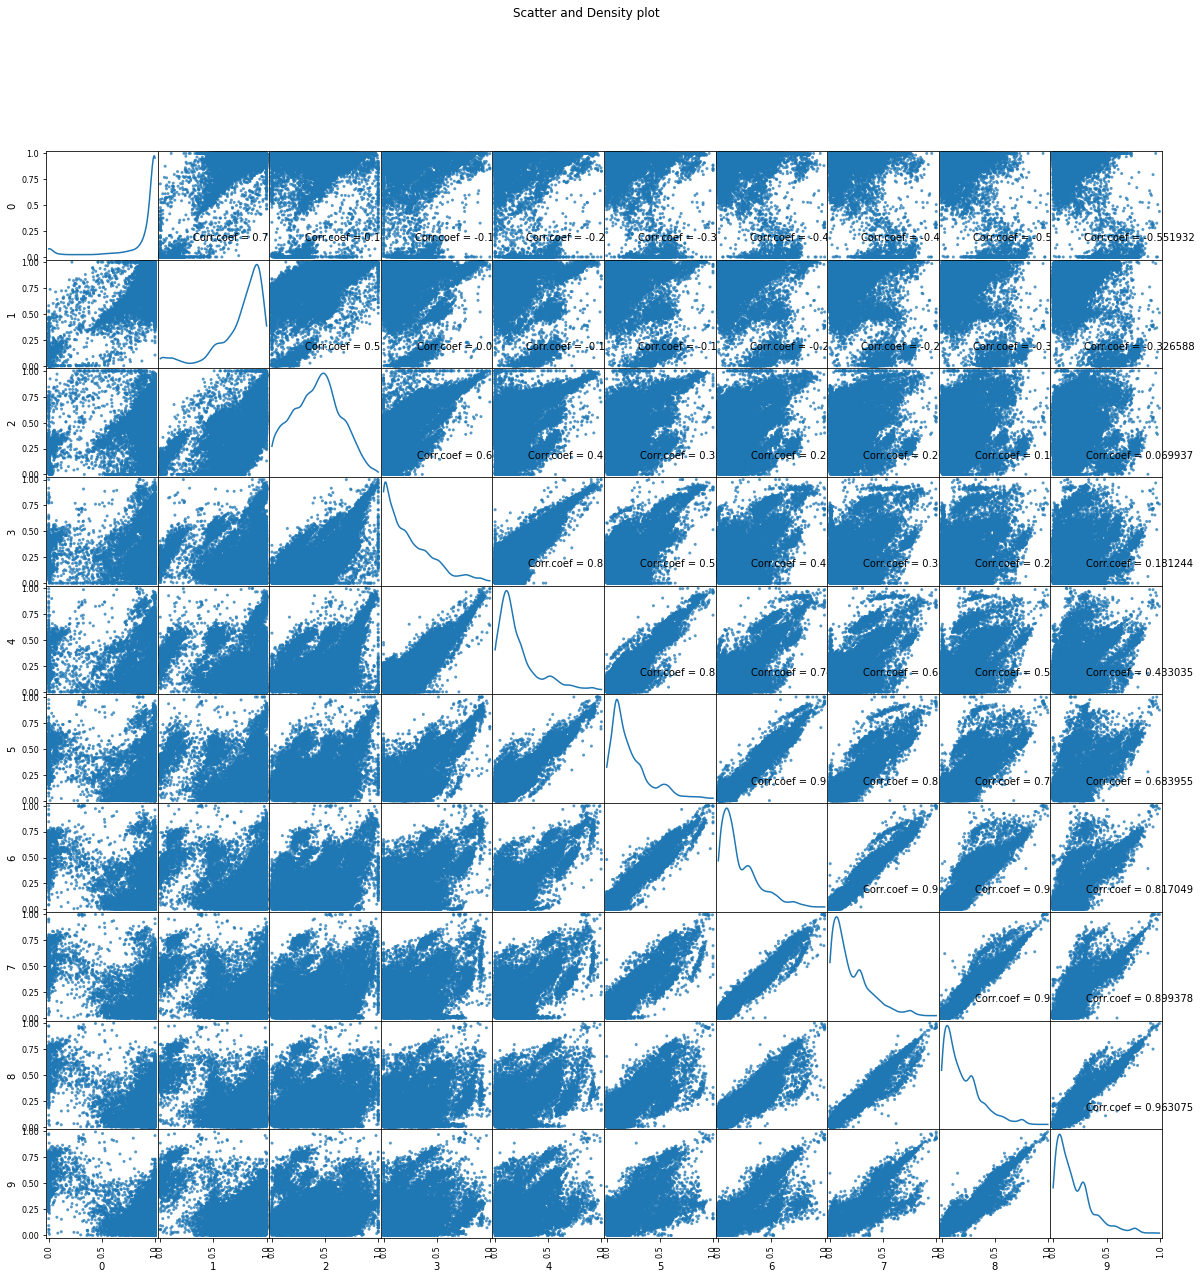

In [12]:
plot_scatter(MIT_test)

In [13]:
def Corr_Mat(df):
    df.dropna('columns')
    
    #Remove columns which have less tham 1 unique values
    df= df[[col for col in df if df[col].nunique()>1]]
    
    if df.shape[1] < 2:
        print("No correlation matrix is shown since the number of Non-Nan or constant columns (df.shape[1]) is less than 2")
        return 
    
    # Plotting coorelation matrix
    corr = df.corr()
    plt.figure(figsize= [10,10], dpi= 100, facecolor= 'w', edgecolor= 'k')
    corrMat= plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

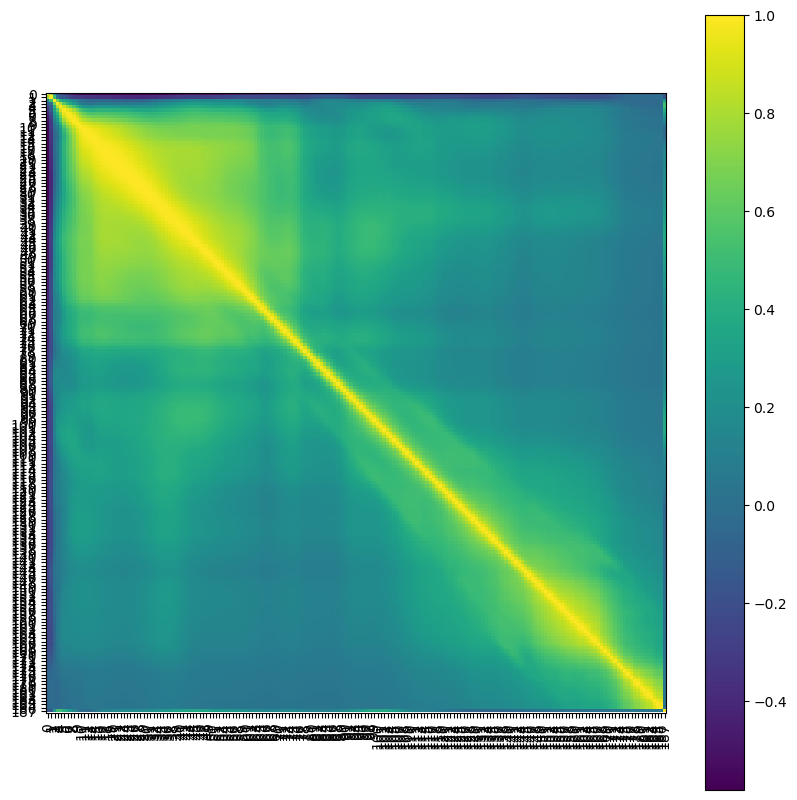

In [14]:
Corr_Mat(MIT_test)

In [15]:
PTB_ab= pd.read_csv('archive/ptbdb_abnormal.csv', header= None)
PTB_ab

0         1         2         3         4         5         6    \
0      0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1      1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2      1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3      0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4      0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   
...         ...       ...       ...       ...       ...       ...       ...   
10501  0.981409  1.000000  0.559171  0.287093  0.196639  0.204862  0.215946   
10502  0.906250  0.922379  0.878024  0.810484  0.712702  0.667339  0.608871   
10503  1.000000  0.867971  0.674122  0.470332  0.296987  0.169307  0.077664   
10504  1.000000  0.984672  0.658888  0.556394  0.446809  0.395790  0.315260   
10505  0.997886  0.700317  0.464059  0.318182  0.233615  0.184989  0.124207   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
10501  0.243833  0.242760  0.250268  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10502  0.527218  0.480847  0.442540  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10503  0.081392  0.074868  0.089779  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10504  0.276367  0.261039  0.258522  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10505  0.082981  0.087738  0.063953  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  1.0  
1      0.0  0.0  1.0  
2      0.0  0.0  1.0  
3      0.0  0.0  1.0  
4      0.0  0.0  1.0  
...    ...  ...  ...  
10501  0.0  0.0  1.0  
10502  0.0  0.0  1.0  
10503  0.0  0.0  1.0  
10504  0.0  0.0  1.0  
10505  0.0  0.0  1.0  

[10506 rows x 188 columns]

In [16]:
PTB_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


In [17]:
PTB_ab.describe()

0             1             2             3             4    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.975468      0.725582      0.438306      0.290384      0.252897   
std        0.036354      0.199030      0.262699      0.270977      0.237004   
min        0.624227      0.000000      0.000000      0.000000      0.000000   
25%        0.957325      0.586602      0.236455      0.074064      0.088487   
50%        1.000000      0.745646      0.404297      0.212845      0.173046   
75%        1.000000      0.890043      0.620889      0.427811      0.343089   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.249423      0.245668      0.247160      0.250203      0.252396   
std        0.211751      0.200159      0.194840      0.193160      0.192341   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.101422      0.097175      0.096331      0.098527      0.098041   
50%        0.180927      0.182782      0.191793      0.197088      0.200919   
75%        0.327582      0.328089      0.347707      0.359378      0.370106   
max        1.000000      1.000000      0.985523      0.993213      0.997738   

       ...           178           179           180           181  \
count  ...  10506.000000  10506.000000  10506.000000  10506.000000   
mean   ...      0.001055      0.001057      0.000744      0.000554   
std    ...      0.022312      0.022585      0.017557      0.013781   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      0.791899      0.773743      0.789804      0.628177   

                182           183           184           185      186  \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.0   
mean       0.000533      0.000313      0.000070      0.000074      0.0   
std        0.013553      0.010901      0.003754      0.004044      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        0.000000      0.000000      0.000000      0.000000      0.0   
max        0.602033      0.644880      0.265025      0.279310      0.0   

           187  
count  10506.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  

[8 rows x 188 columns]

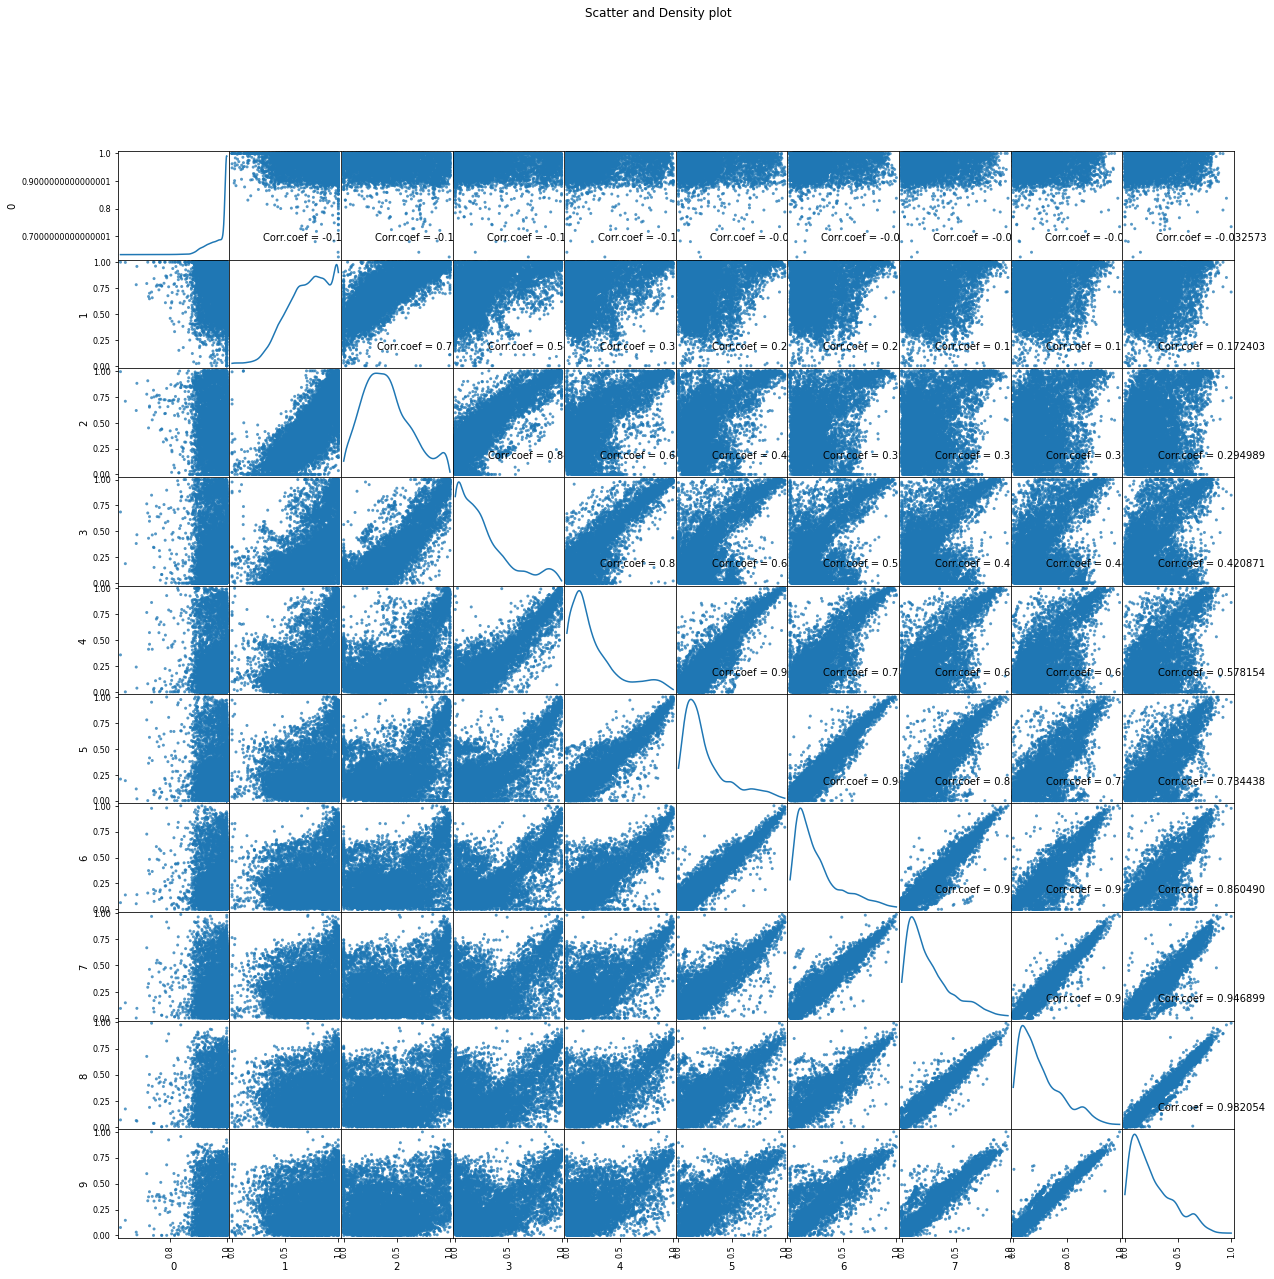

In [18]:
plot_scatter(PTB_ab)

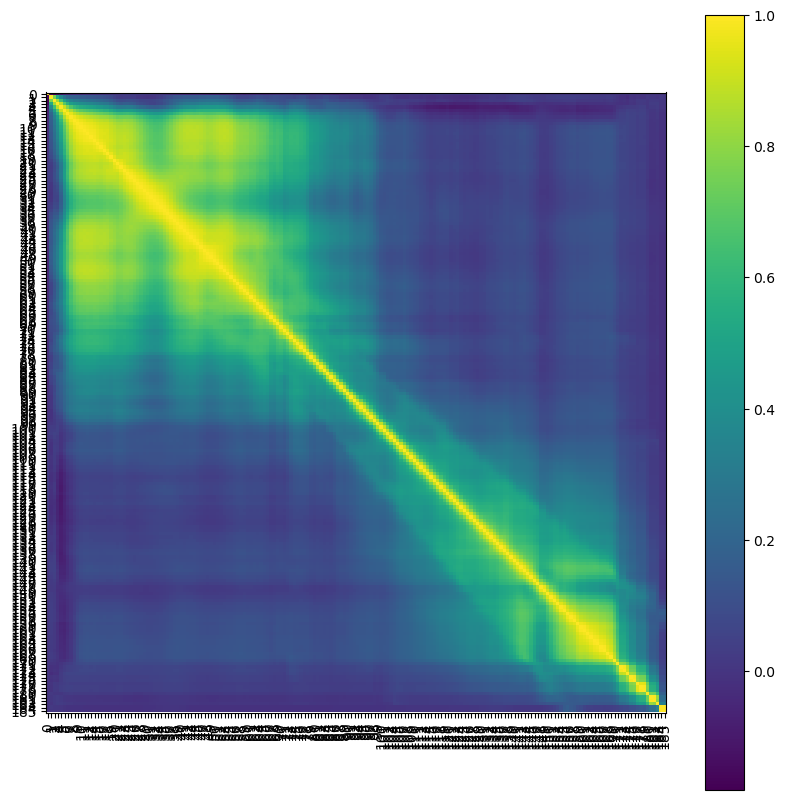

In [19]:
Corr_Mat(PTB_ab)

In [20]:
PTB_n= pd.read_csv('archive/ptbdb_normal.csv', header= None)
PTB_n

0         1         2         3         4         5         6    \
0     1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1     1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2     0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3     1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4     1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
...        ...       ...       ...       ...       ...       ...       ...   
4041  1.000000  0.929586  0.503550  0.293491  0.169822  0.159763  0.130769   
4042  1.000000  0.637579  0.154837  0.061983  0.088965  0.083374  0.065143   
4043  1.000000  0.872574  0.465071  0.232212  0.126132  0.155886  0.174644   
4044  0.915983  0.529373  0.288406  0.144536  0.171802  0.180669  0.177566   
4045  1.000000  0.838643  0.390567  0.191146  0.033513  0.055854  0.129086   

           7         8         9    ...  178  179  180  181  182  183  184  \
0     0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
4041  0.125444  0.137278  0.111243  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4042  0.057365  0.060039  0.060039  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4043  0.190168  0.203752  0.168823  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4044  0.176458  0.178896  0.180448  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4045  0.147290  0.155151  0.165494  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      185  186  187  
0     0.0  0.0  0.0  
1     0.0  0.0  0.0  
2     0.0  0.0  0.0  
3     0.0  0.0  0.0  
4     0.0  0.0  0.0  
...   ...  ...  ...  
4041  0.0  0.0  0.0  
4042  0.0  0.0  0.0  
4043  0.0  0.0  0.0  
4044  0.0  0.0  0.0  
4045  0.0  0.0  0.0  

[4046 rows x 188 columns]

In [21]:
PTB_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [22]:
PTB_n.describe()

0            1            2            3            4    \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000   
mean      0.979670     0.711486     0.311677     0.119575     0.088608   
std       0.029061     0.186376     0.183457     0.110457     0.075760   
min       0.782178     0.121784     0.000000     0.000000     0.000000   
25%       0.964468     0.580160     0.164112     0.028731     0.027735   
50%       1.000000     0.726449     0.303266     0.092655     0.079476   
75%       1.000000     0.863699     0.436091     0.187527     0.134861   
max       1.000000     1.000000     0.985955     0.910798     0.846591   

               5            6            7            8            9    ...  \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000  ...   
mean      0.130843     0.159653     0.165608     0.168005     0.170783  ...   
std       0.081104     0.090131     0.096094     0.102506     0.106190  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.070776     0.094656     0.098848     0.095594     0.094988  ...   
50%       0.121144     0.134312     0.142771     0.143002     0.145068  ...   
75%       0.183746     0.216203     0.217895     0.220572     0.223053  ...   
max       0.770205     0.754524     0.749095     0.729192     0.700844  ...   

               178          179          180          181          182  \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000   
mean      0.001540     0.001332     0.001304     0.001220     0.000991   
std       0.018664     0.016234     0.016668     0.016658     0.015204   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.415879     0.361283     0.383522     0.407025     0.446281   

               183          184          185     186     187  
count  4046.000000  4046.000000  4046.000000  4046.0  4046.0  
mean      0.000894     0.000454     0.000474     0.0     0.0  
std       0.015311     0.010834     0.011202     0.0     0.0  
min       0.000000     0.000000     0.000000     0.0     0.0  
25%       0.000000     0.000000     0.000000     0.0     0.0  
50%       0.000000     0.000000     0.000000     0.0     0.0  
75%       0.000000     0.000000     0.000000     0.0     0.0  
max       0.483471     0.371502     0.376668     0.0     0.0  

[8 rows x 188 columns]

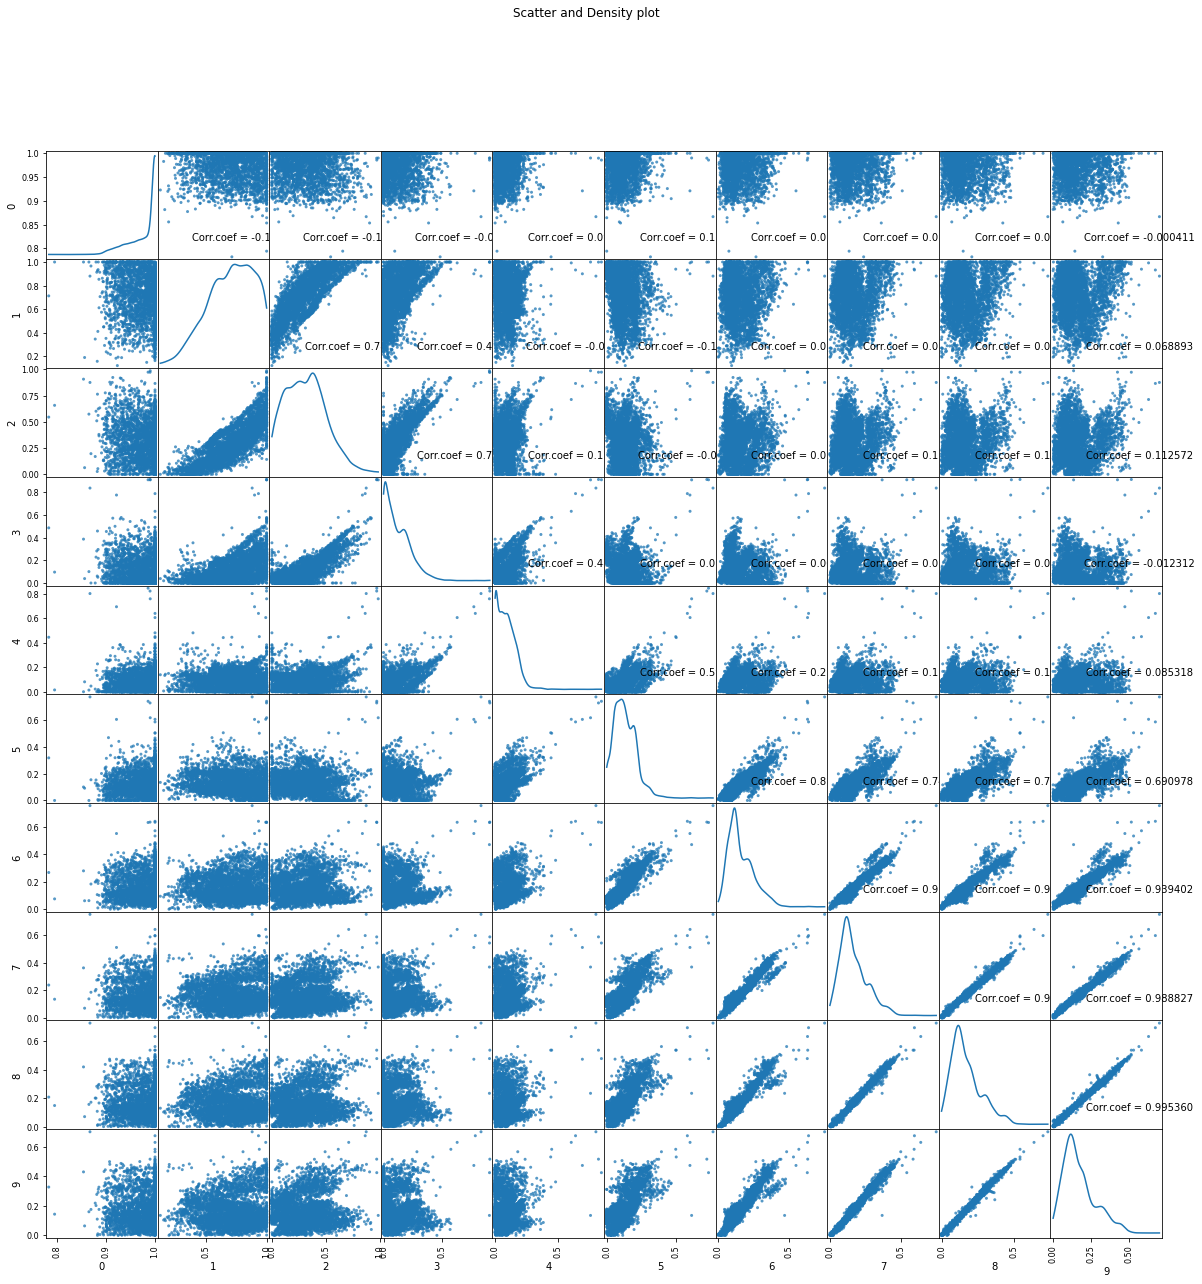

In [23]:
plot_scatter(PTB_n)

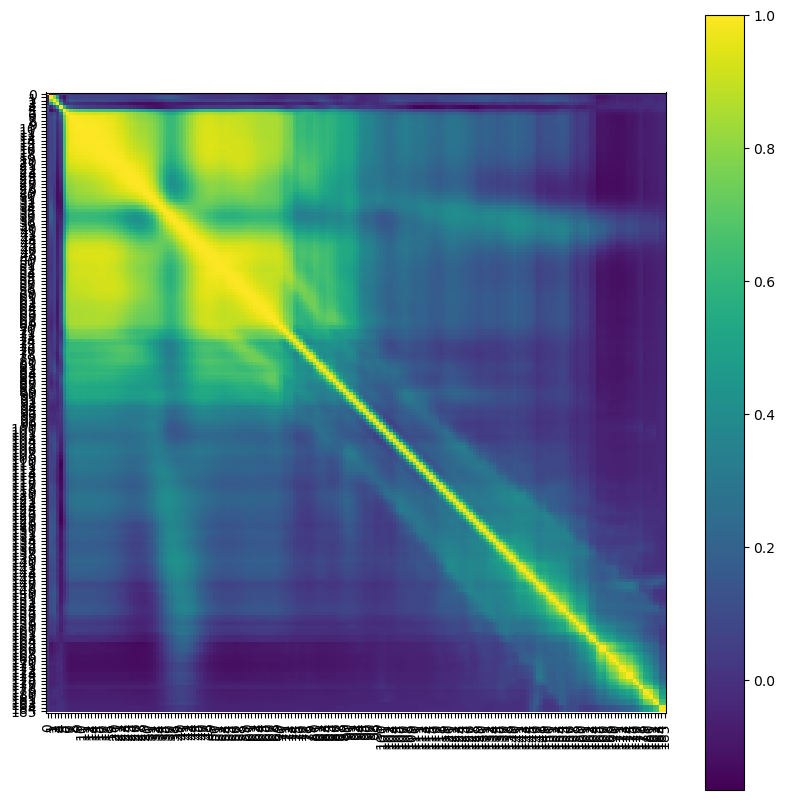

In [24]:
Corr_Mat(PTB_n)

In [25]:
MIT_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [26]:
MIT_train.describe()

0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240      0.171778      0.168357   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.088416      0.073333      0.066116      0.065000      0.068639   
50%        0.158798      0.145324      0.144424      0.150000      0.148734   
75%        0.287628      0.298237      0.295391      0.290832      0.283636   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...           178           179           180           181  \
count  ...  87554.000000  87554.000000  87554.000000  87554.000000   
mean   ...      0.005025      0.004628      0.004291      0.003945   
std    ...      0.044154      0.042089      0.040525      0.038651   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                182           183           184           185           186  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.003681      0.003471      0.003221      0.002945      0.002807   
std        0.037193      0.036255      0.034789      0.032865      0.031924   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                187  
count  87554.000000  
mean       0.473376  
std        1.143184  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 188 columns]

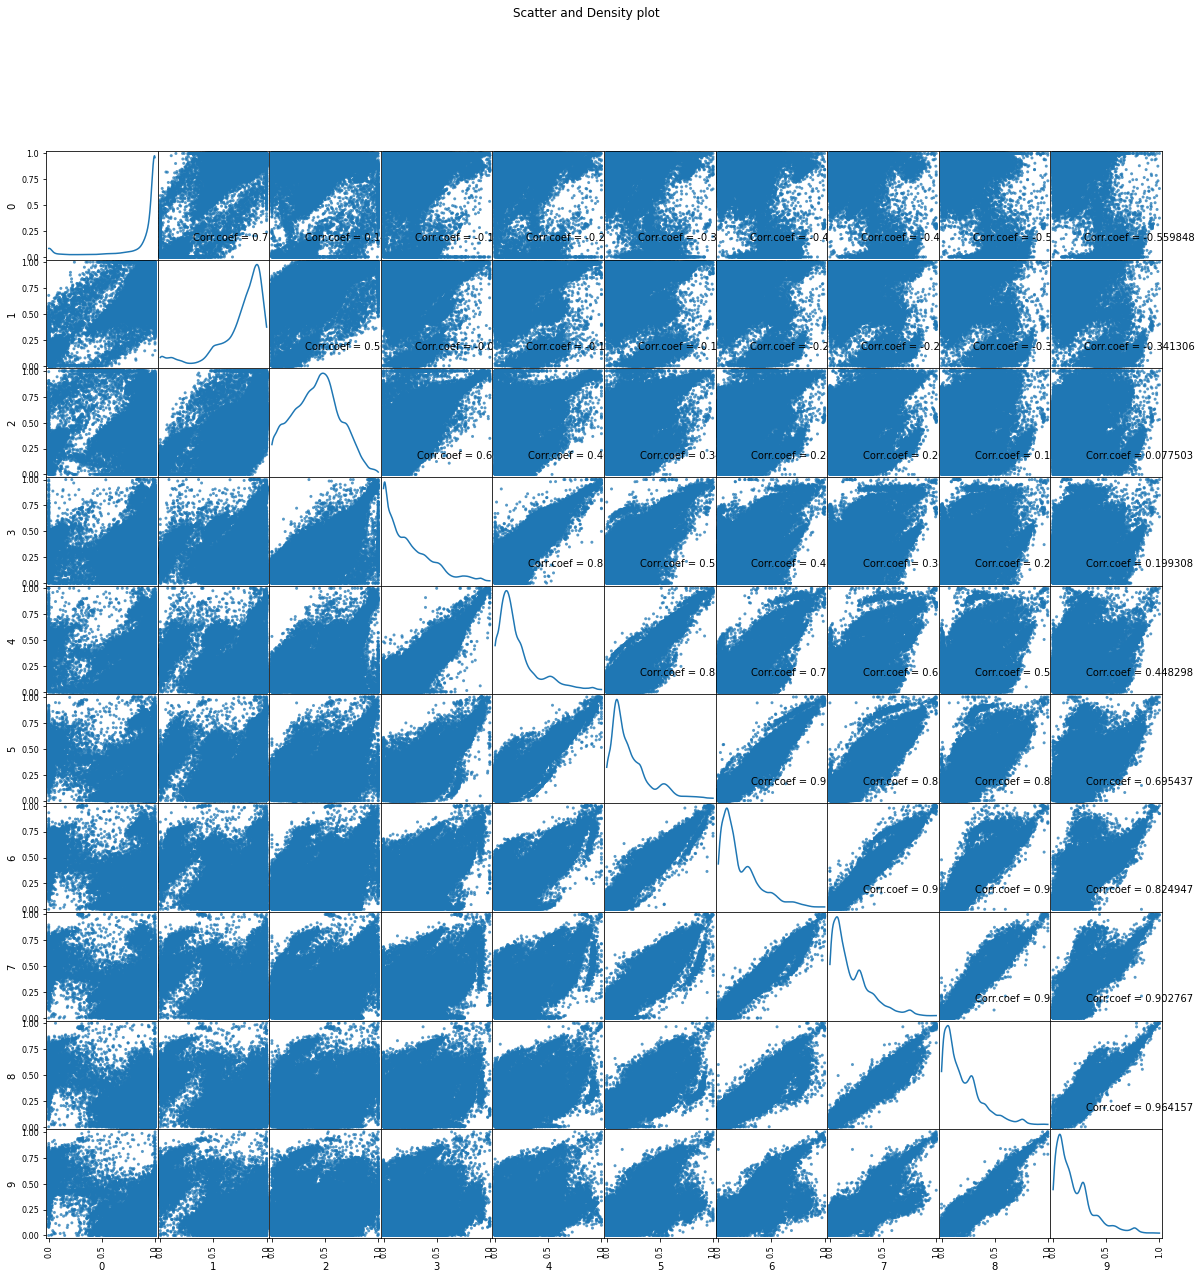

In [27]:
plot_scatter(MIT_train)

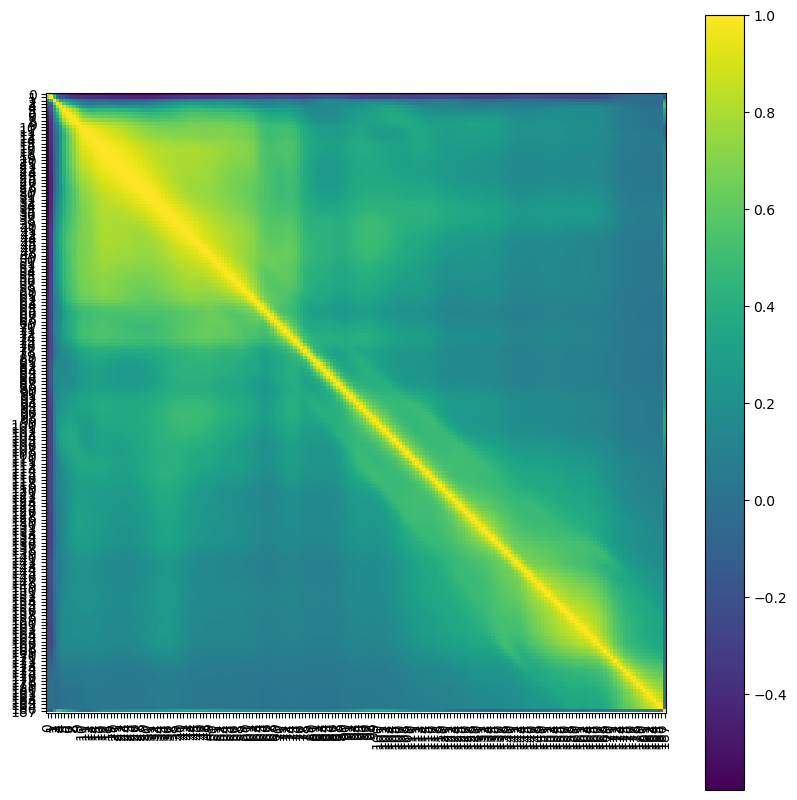

In [28]:
Corr_Mat(MIT_train)

## Let's visualize the train data further

In [29]:
PTB_ab.shape, PTB_n.shape

((10506, 188), (4046, 188))

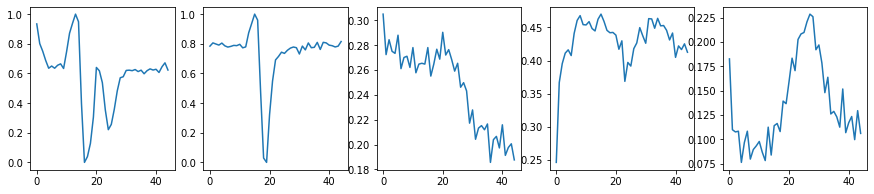

In [30]:
# Let's view the signals of abnormal data PTB_ab
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Abormal Persons')
plt.subplot(1, 5, 1)
plt.plot(PTB_ab.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(PTB_ab.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(PTB_ab.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(PTB_ab.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(PTB_ab.values[44][5:50])

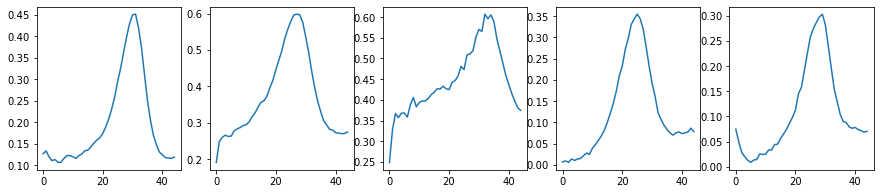

In [31]:
#Let's view the signals of normal data PTB_n
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(PTB_n.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(PTB_n.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(PTB_n.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(PTB_n.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(PTB_n.values[77][5:50])

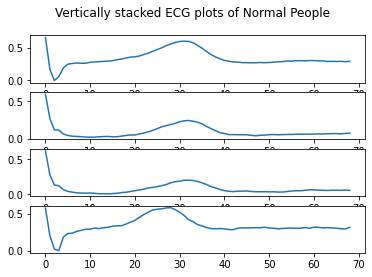

In [32]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked ECG plots of Normal People')
axs[0].plot(PTB_n.values[10][1:70])
axs[1].plot(PTB_n.values[55][1:70])
axs[2].plot(PTB_n.values[87][1:70])
axs[3].plot(PTB_n.values[98][1:70])

Text(0.5, 1.0, 'Visualizing the signals of train dataset')

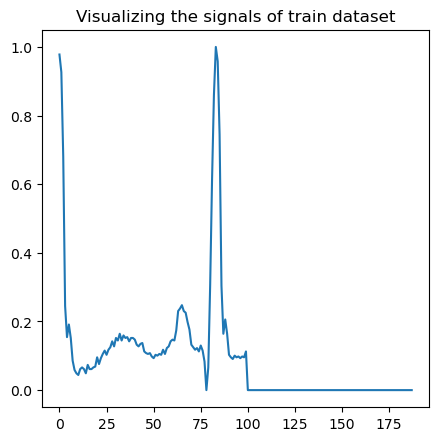

In [33]:
plt.figure(figsize= [5,5], dpi=100)
plt.plot(MIT_train.iloc[0,0:188])
plt.title("Visualizing the signals of train dataset")

In [34]:
MIT_train.head(2)

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  

[2 rows x 188 columns]

In [35]:
MIT_train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)

In [36]:
data_1= MIT_train[MIT_train[187] == 1]
data_2= MIT_train[MIT_train[187] == 2]
data_3= MIT_train[MIT_train[187] == 3]
data_4= MIT_train[MIT_train[187] == 4]

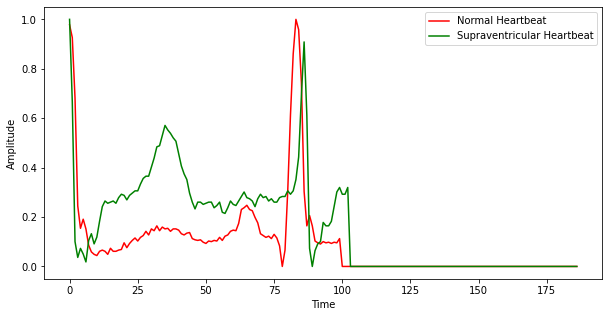

In [37]:
plt.figure(figsize= (10,5))
plt.plot(MIT_train.iloc[0, 0:187], color = 'red', label= 'Normal Heartbeat')
plt.plot(data_1.iloc[0,0:187],color= 'green',label= 'Supraventricular Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

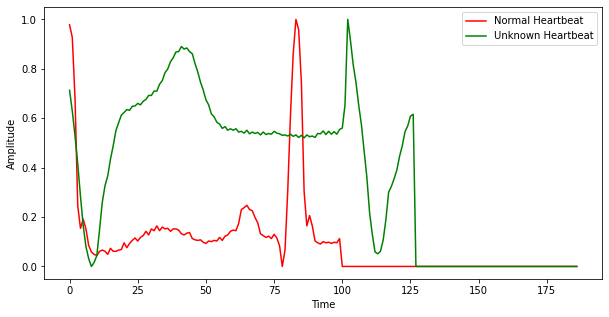

In [38]:
plt.figure(figsize= (10,5))
plt.plot(MIT_train.iloc[0, 0:187], color = 'red', label= 'Normal Heartbeat')
plt.plot(data_4.iloc[0,0:187],color= 'green',label= 'Unknown Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

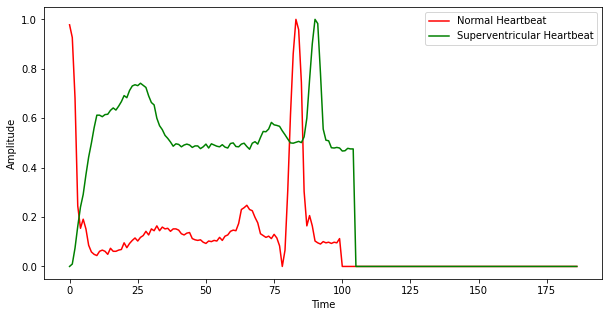

In [39]:
plt.figure(figsize= (10,5))
plt.plot(MIT_train.iloc[0, 0:187], color = 'red', label= 'Normal Heartbeat')
plt.plot(data_2.iloc[0,0:187],color= 'green',label= 'Superventricular Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

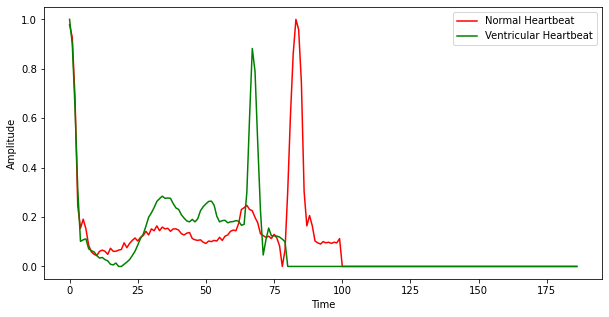

In [40]:
plt.figure(figsize= (10,5))
plt.plot(MIT_train.iloc[0, 0:187], color = 'red', label= 'Normal Heartbeat')
plt.plot(data_3.iloc[0,0:187],color= 'green',label= 'Ventricular Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

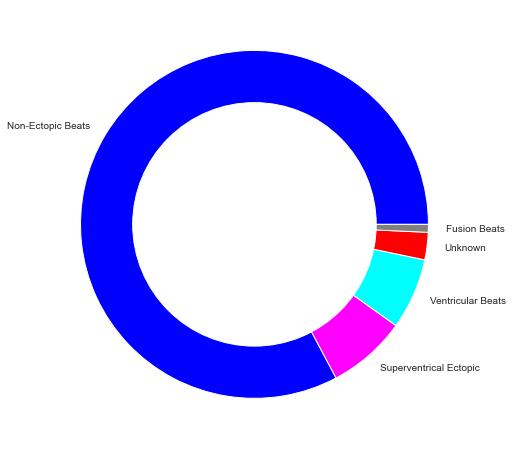

In [41]:
# viewing the distribution of beats in our dataset 
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(MIT_train[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

##### Let's remove the bias from our dataset using resampling technique

In [42]:
#Creating balance of classes
from sklearn.utils import resample

data_0 = (MIT_train[MIT_train[187] == 0]).sample(n=20000, random_state=123)

data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000, 
                           random_state=123, replace=True)

MIT_train_dataset = pd.concat([data_0, data_1_resample, data_2_resample, data_3_resample, data_4_resample])
MIT_train_dataset.shape

(100000, 188)

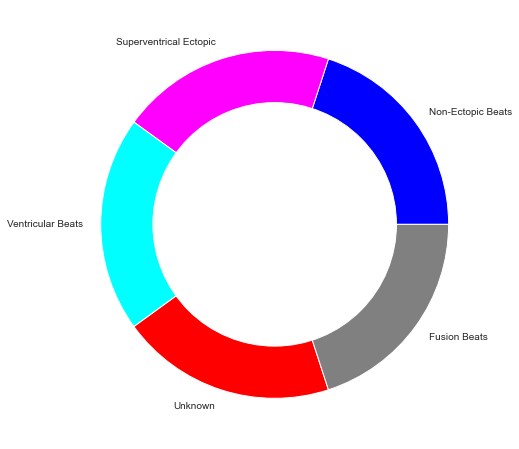

In [43]:
# Let's plot a piechart to view the distribution of dataset after resampling
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(MIT_train_dataset[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

#### Splitting into Train and Test datasets

In [45]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [46]:
from sklearn.utils import resample

#Independent data from PTB_n (PTB normal)
PTB_y_normal = np.zeros(PTB_n.shape[0])
PTB_y_normal = pd.DataFrame(PTB_y_normal)

#Independent data from PTB_ab (PTB abnormal)
PTB_y_abnormal = np.ones(PTB_ab.shape[0])
PTB_y_abnormal = pd.DataFrame(PTB_y_abnormal)

#Merging original dataframes (dependent)
PTB_X = pd.concat([PTB_n, PTB_ab], sort=True)
PTB_Y = pd.concat([PTB_y_normal, PTB_y_abnormal], sort = True)

In [47]:
PTB_X.shape, PTB_Y.shape

((14552, 188), (14552, 1))

In [48]:
PTB_X_train, PTB_X_test, PTB_y_train, PTB_y_test = train_test_split(PTB_X, PTB_Y, random_state = 102, test_size = 0.20)
PTB_X_train.shape, PTB_X_test.shape, PTB_y_train.shape, PTB_y_test.shape

((11641, 188), (2911, 188), (11641, 1), (2911, 1))

In [49]:
MIT_train_dataset[187].value_counts()

0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64

In [50]:
MIT_train_target = MIT_train_dataset[187]
MIT_test_target = MIT_test[187]

#MIT_train_target.unique().shape
MIT_train_target.unique()

array([0., 1., 2., 3., 4.])

In [51]:
MIT_y_train = to_categorical(MIT_train_target)
MIT_y_test = to_categorical(MIT_test_target)

MIT_y_train[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [52]:
MIT_X_train = MIT_train_dataset.iloc[:,:-1].values
MIT_X_test = MIT_test.iloc[:,:-1].values

MIT_X_train.shape, MIT_X_test.shape, MIT_y_train.shape, MIT_y_test.shape

((100000, 187), (21892, 187), (100000, 5), (21892, 5))

# Let's Now apply Models

## First we'll use Random Forest Classifier

In [53]:
start = time.time()

RF = RandomForestClassifier()
RF.fit(MIT_X_train, MIT_y_train)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

Time Taken: 54.414 seconds


In [54]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

###### Prediction on MIT data

In [55]:
# making predictions on MIT test set
start = time.time()

MIT_y_pred = RF.predict(MIT_X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

MIT_y_pred[:10]

Time Taken: 0.460 seconds


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [56]:
# check accuracy
print('Accuracy on train data: %.4f' % RF.score(MIT_X_train, MIT_y_train))
print('Accuracy on test data %.4f' % RF.score(MIT_X_test, MIT_y_test))

Accuracy on train data: 1.0000
Accuracy on test data 0.9669


In [57]:
print(classification_report(MIT_y_test, MIT_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.86      0.71      0.77       556
           2       0.96      0.91      0.94      1448
           3       0.80      0.70      0.75       162
           4       0.99      0.96      0.97      1608

   micro avg       0.98      0.97      0.97     21892
   macro avg       0.92      0.85      0.88     21892
weighted avg       0.98      0.97      0.97     21892
 samples avg       0.97      0.97      0.97     21892



In [58]:
#print(plot_confusion_matrix(RF,))

###### Prediction on PTB Data

In [59]:
start = time.time()

RF.fit(PTB_X_train, PTB_y_train)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

Time Taken: 3.046 seconds


In [60]:
# making predictions on PTB test set
start = time.time()

PTB_y_pred = RF.predict(PTB_X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

PTB_y_pred[:10]

Time Taken: 0.027 seconds


array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [61]:
# check accuracy
print('Accuracy on train data: %.4f' % RF.score(PTB_X_train, PTB_y_train))
print('Accuracy on test data %.4f' % RF.score(PTB_X_test, PTB_y_test))

Accuracy on train data: 1.0000
Accuracy on test data 1.0000


In [62]:
print(classification_report(PTB_y_test, PTB_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       785
         1.0       1.00      1.00      1.00      2126

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911



## Let's use Support Vector Machine

###### MIT Data

In [63]:
# MIT_X_train.reshape(1,-1)
# #y_train.to_numpy()
# MIT_X_train.shape

In [64]:
# MIT_y_train.reshape(1,-1)
# MIT_y_train.shape

In [65]:
start = time.time()
svc = SVC(random_state= 140)
#svc.fit(np.argmax(MIT_X_train, axis= 1), np.argmax(MIT_y_train,axis= 1))
svc.fit(MIT_X_train,np.argmax(MIT_y_train, axis = 1))

end = time.time()
print("Time Taken: %.3f seconds" % (end-start))

Time Taken: 223.868 seconds


In [66]:
#MIT_y_pred_svc = svc.predict(np.argmax(MIT_X_test, axis = 1))
MIT_y_pred_svc = svc.predict(MIT_X_test)
MIT_y_pred_svc[:5]

array([0, 0, 0, 0, 0])

In [67]:
# print('Acc train %.4f' % svc.score(np.argmax(MIT_X_train, axis = 1), np.argmax(MIT_y_train, axis=1)))
# print('Acc test %.4f' % svc.score(np.argmax(MIT_X_test, axis = 1), np.argmax(MIT_y_test, axis=1)))
print('Acc train %.4f' % svc.score(MIT_X_train, np.argmax(MIT_y_train, axis=1)))
print('Acc test %.4f' % svc.score(MIT_X_test, np.argmax(MIT_y_test, axis=1)))

Acc train 0.9457
Acc test 0.9032


In [68]:
print(classification_report(np.argmax(MIT_y_test, axis=1), MIT_y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18118
           1       0.35      0.82      0.49       556
           2       0.84      0.92      0.88      1448
           3       0.16      0.93      0.28       162
           4       0.94      0.98      0.96      1608

    accuracy                           0.90     21892
   macro avg       0.66      0.91      0.71     21892
weighted avg       0.95      0.90      0.92     21892



In [69]:
start = time.time()

svc.fit(PTB_X_train, PTB_y_train)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

Time Taken: 0.559 seconds


In [70]:
# making predictions on PTB test set
start = time.time()

PTB_y_pred = svc.predict(PTB_X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

PTB_y_pred[:10]

Time Taken: 0.172 seconds


array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [71]:
# check accuracy
print('Accuracy on train data: %.4f' % RF.score(PTB_X_train, PTB_y_train))
print('Accuracy on test data %.4f' % RF.score(PTB_X_test, PTB_y_test))

Accuracy on train data: 1.0000
Accuracy on test data 1.0000


In [72]:
print(classification_report(PTB_y_test, PTB_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       785
         1.0       1.00      1.00      1.00      2126

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911



## Let's Use CNN

###### MIT dataset

In [73]:
MIT_X_train = MIT_X_train.reshape(len(MIT_X_train), MIT_X_train.shape[1], 1)
MIT_X_test = MIT_X_test.reshape(len(MIT_X_test), MIT_X_test.shape[1], 1)
MIT_X_train.shape, MIT_X_test.shape

((100000, 187, 1), (21892, 187, 1))

In [74]:
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [75]:
model = model()
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 64)           448       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 94, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 94, 64)            24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)         

2022-12-27 14:31:30.768457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-27 14:31:30.769595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [78]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(MIT_X_train, MIT_y_train, epochs=50, batch_size=32,
          validation_data=(MIT_X_test, MIT_y_test), callbacks=[logger])

Epoch 1/50


2022-12-27 14:35:55.663582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3125/3125 [==============================] - 50s 16ms/step - loss: 0.1861 - accuracy: 0.9331 - val_loss: 0.1186 - val_accuracy: 0.9651
Epoch 2/50
3125/3125 [==============================] - 49s 16ms/step - loss: 0.0746 - accuracy: 0.9744 - val_loss: 0.1620 - val_accuracy: 0.9482
Epoch 3/50
3125/3125 [==============================] - 49s 16ms/step - loss: 0.0516 - accuracy: 0.9829 - val_loss: 0.1606 - val_accuracy: 0.9530
Epoch 4/50
3125/3125 [==============================] - 57s 18ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.1157 - val_accuracy: 0.9704
Epoch 5/50
3125/3125 [==============================] - 49s 16ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.1119 - val_accuracy: 0.9719
Epoch 6/50
3125/3125 [==============================] - 49s 16ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.1217 - val_accuracy: 0.9703
Epoch 7/50
3125/3125 [==============================] - 131s 42ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.1505 - val_accur

In [79]:
model.evaluate(MIT_X_test, MIT_y_test)

685/685 [==============================] - 5s 7ms/step - loss: 0.2241 - accuracy: 0.9826


[0.22407759726047516, 0.9825964570045471]

##### Let's Visualize our predictions

In [80]:
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

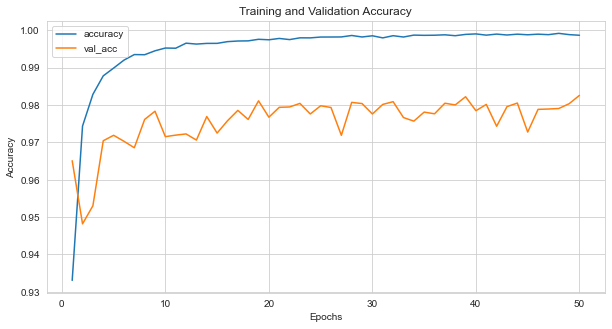

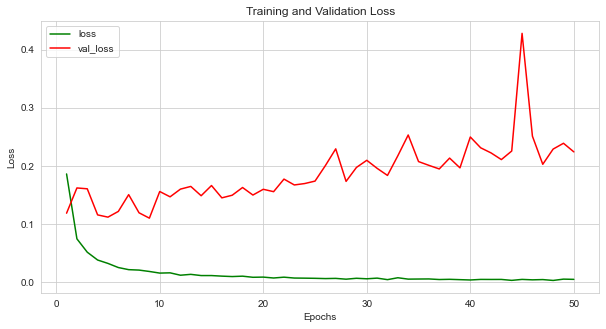

In [81]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [82]:
MIT_y_pred = model.predict(MIT_X_test)
MIT_y_hat = np.argmax(MIT_y_pred, axis = 1)
confusion_matrix(np.argmax(MIT_y_test, axis = 1), MIT_y_hat)

2022-12-27 16:34:07.372985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[17908,   105,    63,    30,    12],
       [   66,   475,    10,     3,     2],
       [   25,     2,  1397,    21,     3],
       [   11,     0,    16,   134,     1],
       [    6,     0,     4,     1,  1597]])

<AxesSubplot:>

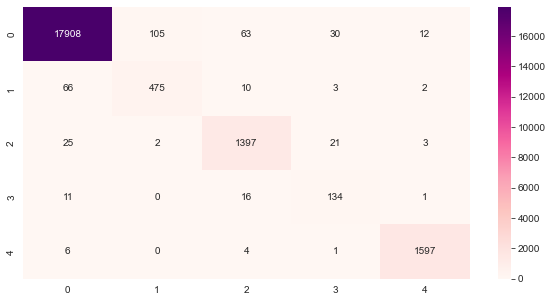

In [83]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(np.argmax(MIT_y_test, axis = 1), MIT_y_hat), annot=True, fmt='0.0f', cmap='RdPu')

In [84]:
print(classification_report(np.argmax(MIT_y_test,axis= 1), MIT_y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.82      0.85      0.83       556
           2       0.94      0.96      0.95      1448
           3       0.71      0.83      0.76       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.89      0.93      0.91     21892
weighted avg       0.98      0.98      0.98     21892

